In [1]:
import numpy as np
n_samples=15
n_features=100
cluster_std=.3

## Replication from payper
centers=np.array([(1,5,4,3,5,5,6,6,4,4,4,4,4,4,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1, 1,1, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1),
(3,10,4,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,6,6,4,4,4,4,4,4,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1, 1,1,1,1),
(2,5,10,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,6,6,4,4,4,4,4,4,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1, 1,1,1,1),
(3,1,4,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,6,6,4,4,4,4,4,4,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1, 1,1,1),
(2,8,4,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,6,6,4,4,4,4,4,4,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1)])

In [2]:
from sklearn.datasets import make_blobs
X1, y1 = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std)
X2, y2 = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std)

In [3]:
X1 = X1.T
X2 = X2.T
row_names = [f"Cell{i+1}-1" for i in range(n_features)]
col_names = [f"Gene{i+1}" for i in range(n_samples)]

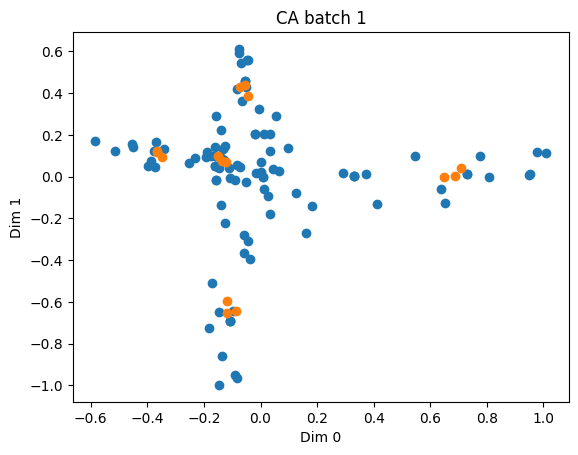

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ca import CA

transfer = CA(n_components=2).fit(contingency_table=X1)

pcs_row1, pcs_col1 = \
    transfer.get_princpl_coords_df(row_categories=row_names,
                                   col_categories=col_names)
variances = transfer.principal_inertias_
percent_explnd_var = (variances / variances.sum()) * 100

fig, ax = plt.subplots()
plt.scatter(x='Dim 0', y='Dim 1', data=pcs_row1)
plt.scatter(x='Dim 0', y='Dim 1', data=pcs_col1)
plt.title('CA batch 1')
ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')
plt.show()


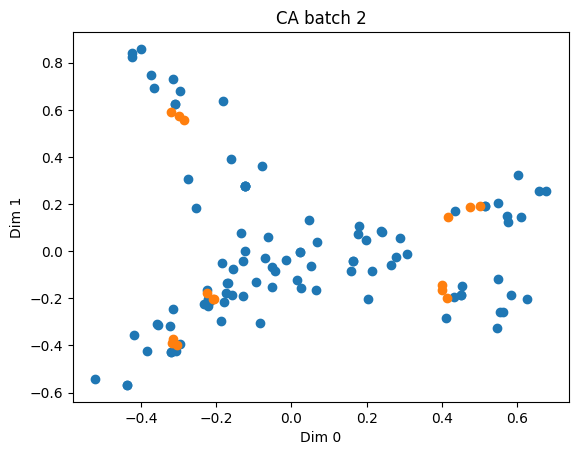

In [5]:
transfer = CA(n_components=2).fit(contingency_table=X2)

pcs_row2, pcs_col2 = \
    transfer.get_princpl_coords_df(row_categories=row_names,
                                   col_categories=col_names)
variances = transfer.principal_inertias_
percent_explnd_var = (variances / variances.sum()) * 100

fig, ax = plt.subplots()
plt.scatter(x='Dim 0', y='Dim 1', data=pcs_row2)
plt.scatter(x='Dim 0', y='Dim 1', data=pcs_col2)
plt.title('CA batch 2')
ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')
plt.show()


In [6]:
import numpy as np

def calculate_length_vector_sample(avg_sample_coord, index_cluster):
    length_vector_sample = np.sqrt(np.sum(np.square(avg_sample_coord[index_cluster])))
    return length_vector_sample

def calculate_S_coordinates_sincos(avg_sample_coord, samples, index_cluster):
    num_samples, num_dims = samples.shape

    length_vector_samples = np.sqrt(np.sum(samples**2, axis=0))
    tmp = np.dot(avg_sample_coord[index_cluster], samples)
    
    Sx = tmp / calculate_length_vector_sample(avg_sample_coord, index_cluster)
    Sy = np.sqrt(length_vector_samples**2 - Sx**2)
    
    return Sx, Sy


In [7]:
def calculate_G_coordinates_sincos(avg_sample_coord, genes, index_cluster):
    num_samples, num_dims = samples.shape

    length_vector_genes = np.sqrt(np.sum(genes**2, axis=0))
    tmp = np.dot(avg_sample_coord[index_cluster], genes)
    
    Gx = tmp / calculate_length_vector_sample(avg_sample_coord, index_cluster)
    Gy = np.sqrt(length_vector_genes**2 - Gx**2)
    
    return Sx, Sy

In [8]:
from sklearn.cluster import KMeans
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(pcs_col1)
cluster_labels1 = kmeans.labels_
index_cluster = 2

Sx1, Sy1 = calculate_S_coordinates_sincos(kmeans.cluster_centers_, pcs_row1.values.T, index_cluster)
Gx1, Gy1 = calculate_S_coordinates_sincos(kmeans.cluster_centers_, pcs_col1.values.T, index_cluster)

In [9]:
from sklearn.cluster import KMeans
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(pcs_col2)
cluster_labels2 = kmeans.labels_

Sx2, Sy2 = calculate_S_coordinates_sincos(kmeans.cluster_centers_, pcs_row2.values.T, index_cluster)
Gx2, Gy2 = calculate_S_coordinates_sincos(kmeans.cluster_centers_, pcs_col2.values.T, index_cluster)

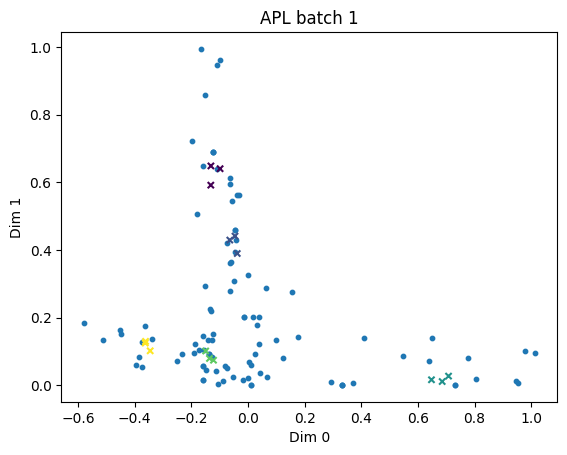

In [10]:

fig, ax = plt.subplots()
plt.scatter(Sx1, Sy1, s=10, marker='o')
plt.scatter(Gx1, Gy1, s=20, c=cluster_labels1, marker='x')
plt.savefig('exp_2_apl_batch1_2.png')
ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')
plt.title('APL batch 1')
plt.show()

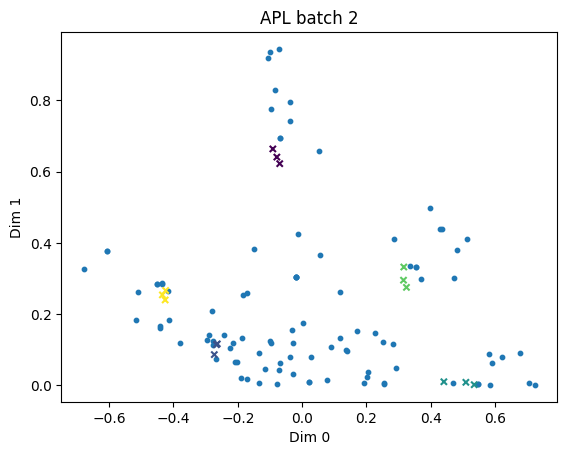

In [11]:
fig, ax = plt.subplots()

plt.scatter(Sx2, Sy2, s=10, marker='o')
plt.scatter(Gx2, Gy2, s=20, c=cluster_labels2, marker='x')
plt.savefig('exp_2_apl_batch1_2.png')
ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')
plt.title('APL batch 2')
plt.show()

In [12]:
from scipy.spatial import cKDTree

def find_mutual_nn(data1, data2, k1, k2, n_jobs):
    k_index_1 = cKDTree(data1).query(x=data2, k=k1, workers=n_jobs)[1]
    k_index_2 = cKDTree(data2).query(x=data1, k=k2, workers=n_jobs)[1]
    mutual_1 = []
    mutual_2 = []
    for index_2 in range(data2.shape[0]):
        for index_1 in k_index_1[index_2]:
            if index_2 in k_index_2[index_1]:
                mutual_1.append(index_1)
                mutual_2.append(index_2)
    return mutual_1, mutual_2

k = 5
n_jobs = 5
b1 = np.column_stack((Gx1, Gy1))
b2 = np.column_stack((Gx2, Gy2))
mnn_ref, mnn_new = find_mutual_nn(data1=b1,
                                  data2=b2, k1=k, k2=k,  n_jobs=n_jobs)

In [13]:
import numpy as np

def compute_correction(data1, data2, mnn1, mnn2, data2_or_raw2, sigma):
    #w
    B = data1[mnn1] - data2[mnn2]
    mnn_index, mnn_count = np.unique(mnn2, return_counts=True)
    vect_reduced = np.zeros((data2.shape[0], B.shape[1]), dtype=np.float32)
    for index, ve in zip(mnn2, B):
        vect_reduced[index] += ve
    vect_avg = np.divide(vect_reduced[mnn_index], mnn_count.astype(np.float32)[:, None])
    #D_c_i
    exp_distance = np.exp(-kdist(data2_or_raw2, data2_or_raw2[mnn_index]) / sigma)
    density = np.sum(exp_distance[mnn_index], axis=0)
    mult = np.divide(exp_distance, density)
    total_prob = np.sum(mult, axis=1, keepdims=True)
    output = np.dot(mult, vect_avg)

    return np.divide(output, total_prob)

In [14]:
def kdist(m, n):
    dist = np.zeros((m.shape[0], n.shape[0]), dtype=np.float32)
    for i in range(m.shape[0]):
        for j in range(n.shape[0]):
            dist[i, j] = np.dot(m[i], n[j])
    return dist

In [15]:
sigma = 10
correction_in = compute_correction(b1, b2, mnn_ref, mnn_new,
                                           b2, sigma)

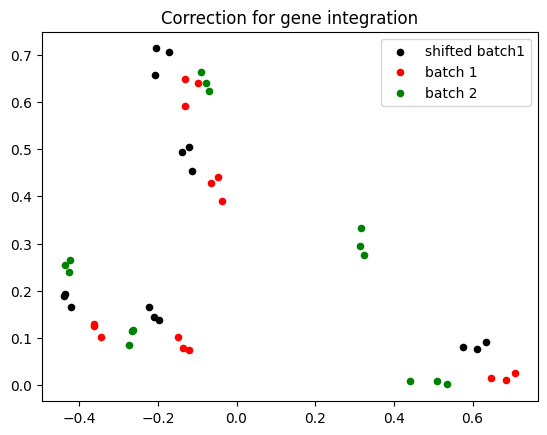

In [16]:
plt.scatter((b1 - correction_in)[:, 0], (b1 - correction_in)[:, 1], marker='o', s=20, c='black', label='shifted batch1')
plt.scatter((b1)[:, 0], (b1)[:, 1], marker='o', s=20, c='red', label='batch 1')
plt.scatter((b2)[:, 0], (b2)[:, 1], marker='o', s=20, c='green', label='batch 2')
plt.title('Correction for gene integration')
plt.legend()